In [38]:
import pandas as pd

dataset = pd.read_csv("clustering_1.csv")

dataset.dropna(inplace=True)
dataset

,requests/s,ProcessTime,QueueTime,SendTime
0,1859.374550,0.002287,0.001179,0.000121
1,1918.923763,0.002362,0.001810,0.000110
2,1916.704779,0.002007,0.000214,0.000119
3,1931.603920,0.002153,0.000232,0.000104
4,1909.183042,0.002057,0.000164,0.000101
...,...,...,...,...
3595,1726.592305,0.003456,0.010118,0.000122
3596,1650.670645,0.003267,0.008006,0.000106
3597,1695.047866,0.003503,0.006702,0.000140
3598,1642.978442,0.002556,0.003132,0.000099


/tmp/ipykernel_171450/3784515080.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


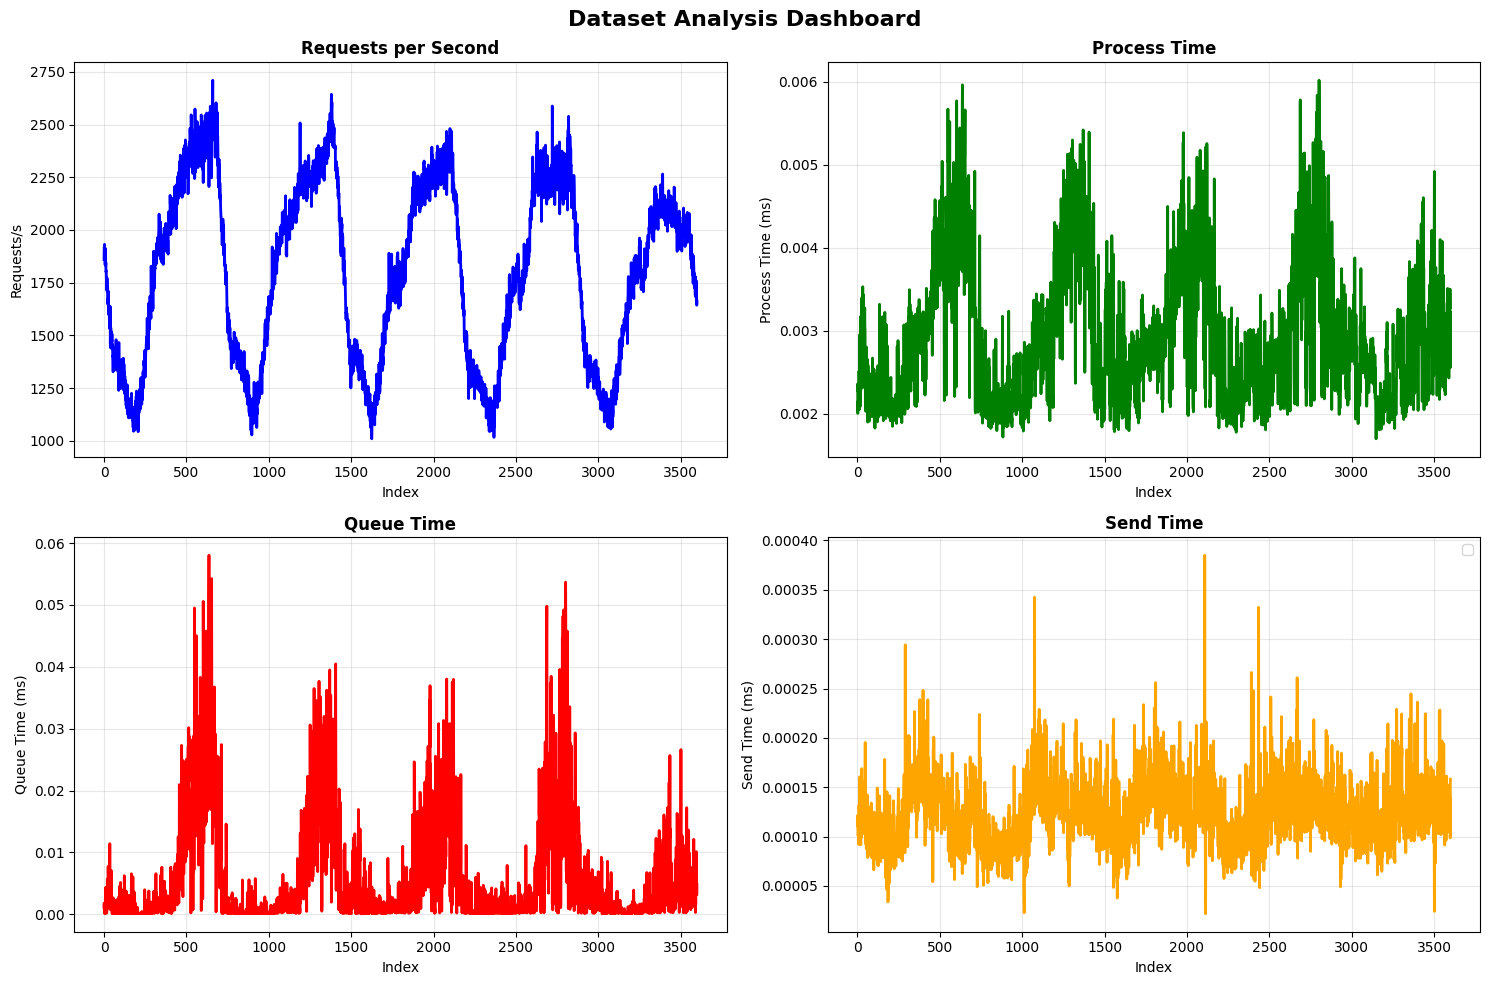

In [39]:
import matplotlib.pyplot as plt

# Create subplots for better organization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Dataset Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: requests/s
axes[0, 0].plot(dataset["requests/s"], color='blue', linewidth=2)
axes[0, 0].set_title('Requests per Second', fontweight='bold')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Requests/s')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: ProcessTime
axes[0, 1].plot(dataset["ProcessTime"], color='green', linewidth=2)
axes[0, 1].set_title('Process Time', fontweight='bold')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Process Time (ms)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: QueueTime
axes[1, 0].plot(dataset["QueueTime"], color='red', linewidth=2)
axes[1, 0].set_title('Queue Time', fontweight='bold')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Queue Time (ms)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: SendTime
axes[1, 1].plot(dataset["SendTime"], color='orange', linewidth=2)
axes[1, 1].set_title('Send Time', fontweight='bold')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Send Time (ms)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()







requests/s: y = 0.010145x + 1786.054543
  MSE = 178165.9879, MedAE = 397.0832, R² = 0.0006
  Mean of requests/s: 1804.311044
  Std of requests/s: 422.228788
----------------------------------------
ProcessTime: y = -0.000000x + 0.002928
  MSE = 6.61e-07, MedAE = 6.38e-04, R² = 0.0000
  Mean of ProcessTime: 0.002924
  Std of ProcessTime: 0.000813
----------------------------------------
QueueTime: y = -0.000000x + 0.006392
  MSE = 7.11e-05, MedAE = 5.08e-03, R² = 0.0020
  Mean of QueueTime: 0.005743
  Std of QueueTime: 0.008441
----------------------------------------
SendTime: y = 0.000000x + 0.000118
  MSE = 1.07e-09, MedAE = 2.09e-05, R² = 0.0110
  Mean of SendTime: 0.000124
  Std of SendTime: 0.000033
----------------------------------------


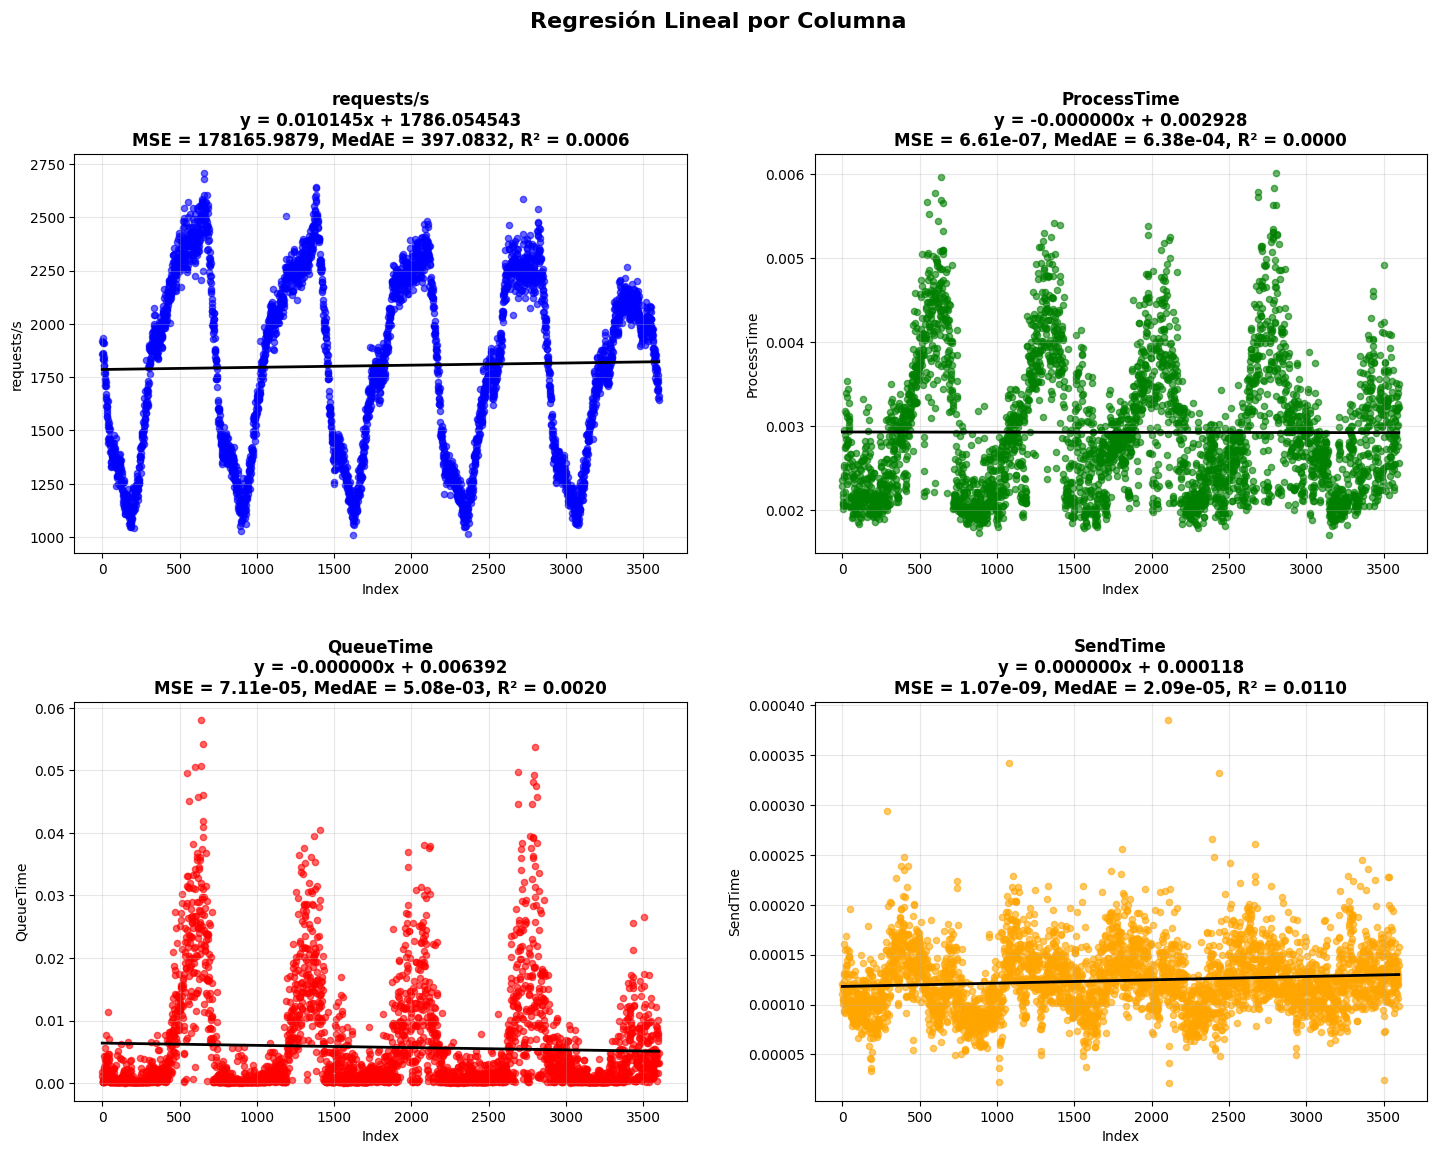

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error
import numpy as np

# Get numeric columns (excluding index)
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

# Define colors to match previous plots
colors = ['blue', 'green', 'red', 'orange']

# Create subplots for linear regression with more spacing
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Regresión Lineal por Columna', fontsize=16, fontweight='bold', y=0.98)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Perform linear regression for each numeric column
for i, column in enumerate(numeric_columns):
    if i < 4:  # Ensure we don't exceed subplot count
        # Prepare data
        X = np.arange(len(dataset)).reshape(-1, 1)  # Index as X
        y = dataset[column].values
        
        # Fit linear regression
        model = LinearRegression()
        model.fit(X, y)
        
        # Get parameters
        m = model.coef_[0]  # slope
        n = model.intercept_  # y-intercept
        
        # Generate prediction line
        y_pred = model.predict(X)
        
        # Calculate Mean Squared Error
        mse = mean_squared_error(y, y_pred)
        
        # Calculate Median Absolute Error
        medae = median_absolute_error(y, y_pred)
        
        # Calculate R-squared for better understanding of fit quality
        r2 = model.score(X, y)
        
        # Plot original data and regression line
        axes_flat[i].scatter(X, y, alpha=0.6, color=colors[i], s=20)
        axes_flat[i].plot(X, y_pred, color='black', linewidth=2)
        
        # Use scientific notation for very small MSE/MedAE values
        mse_str = f"{mse:.2e}" if mse < 0.01 else f"{mse:.4f}"
        medae_str = f"{medae:.2e}" if medae < 0.01 else f"{medae:.4f}"
            
        axes_flat[i].set_title(f'{column}\ny = {m:.6f}x + {n:.6f}\nMSE = {mse_str}, MedAE = {medae_str}, R² = {r2:.4f}', fontweight='bold')
        axes_flat[i].set_xlabel('Index')
        axes_flat[i].set_ylabel(column)
        axes_flat[i].grid(True, alpha=0.3)
        
        # Print parameters and MSE with proper precision
        print(f"{column}: y = {m:.6f}x + {n:.6f}")
        print(f"  MSE = {mse_str}, MedAE = {medae_str}, R² = {r2:.4f}")
        print(f"  Mean of {column}: {np.mean(y):.6f}")
        print(f"  Std of {column}: {np.std(y):.6f}")
        print("-" * 40)

plt.tight_layout(pad=3.0)
plt.show()

requests/s - Ventana 70: MSE = 25919.3512, MAE = 125.4505, R² = 0.8546
requests/s - Ventana 500: MSE = 252845.6432, MAE = 445.2232, R² = -0.4183
requests/s - Ventana 2000: MSE = 187482.2617, MAE = 381.0589, R² = -0.0516
ProcessTime - Ventana 70: MSE = 3.15e-07, MAE = 4.21e-04, R² = 0.5243
ProcessTime - Ventana 500: MSE = 8.20e-07, MAE = 7.37e-04, R² = -0.2395
ProcessTime - Ventana 2000: MSE = 6.81e-07, MAE = 6.65e-04, R² = -0.0304
QueueTime - Ventana 70: MSE = 3.39e-05, MAE = 0.0035, R² = 0.5241
QueueTime - Ventana 500: MSE = 8.59e-05, MAE = 0.0068, R² = -0.2060
QueueTime - Ventana 2000: MSE = 7.30e-05, MAE = 0.0061, R² = -0.0248
SendTime - Ventana 70: MSE = 8.14e-10, MAE = 2.13e-05, R² = 0.2486
SendTime - Ventana 500: MSE = 1.17e-09, MAE = 2.64e-05, R² = -0.0813
SendTime - Ventana 2000: MSE = 1.09e-09, MAE = 2.52e-05, R² = -0.0063


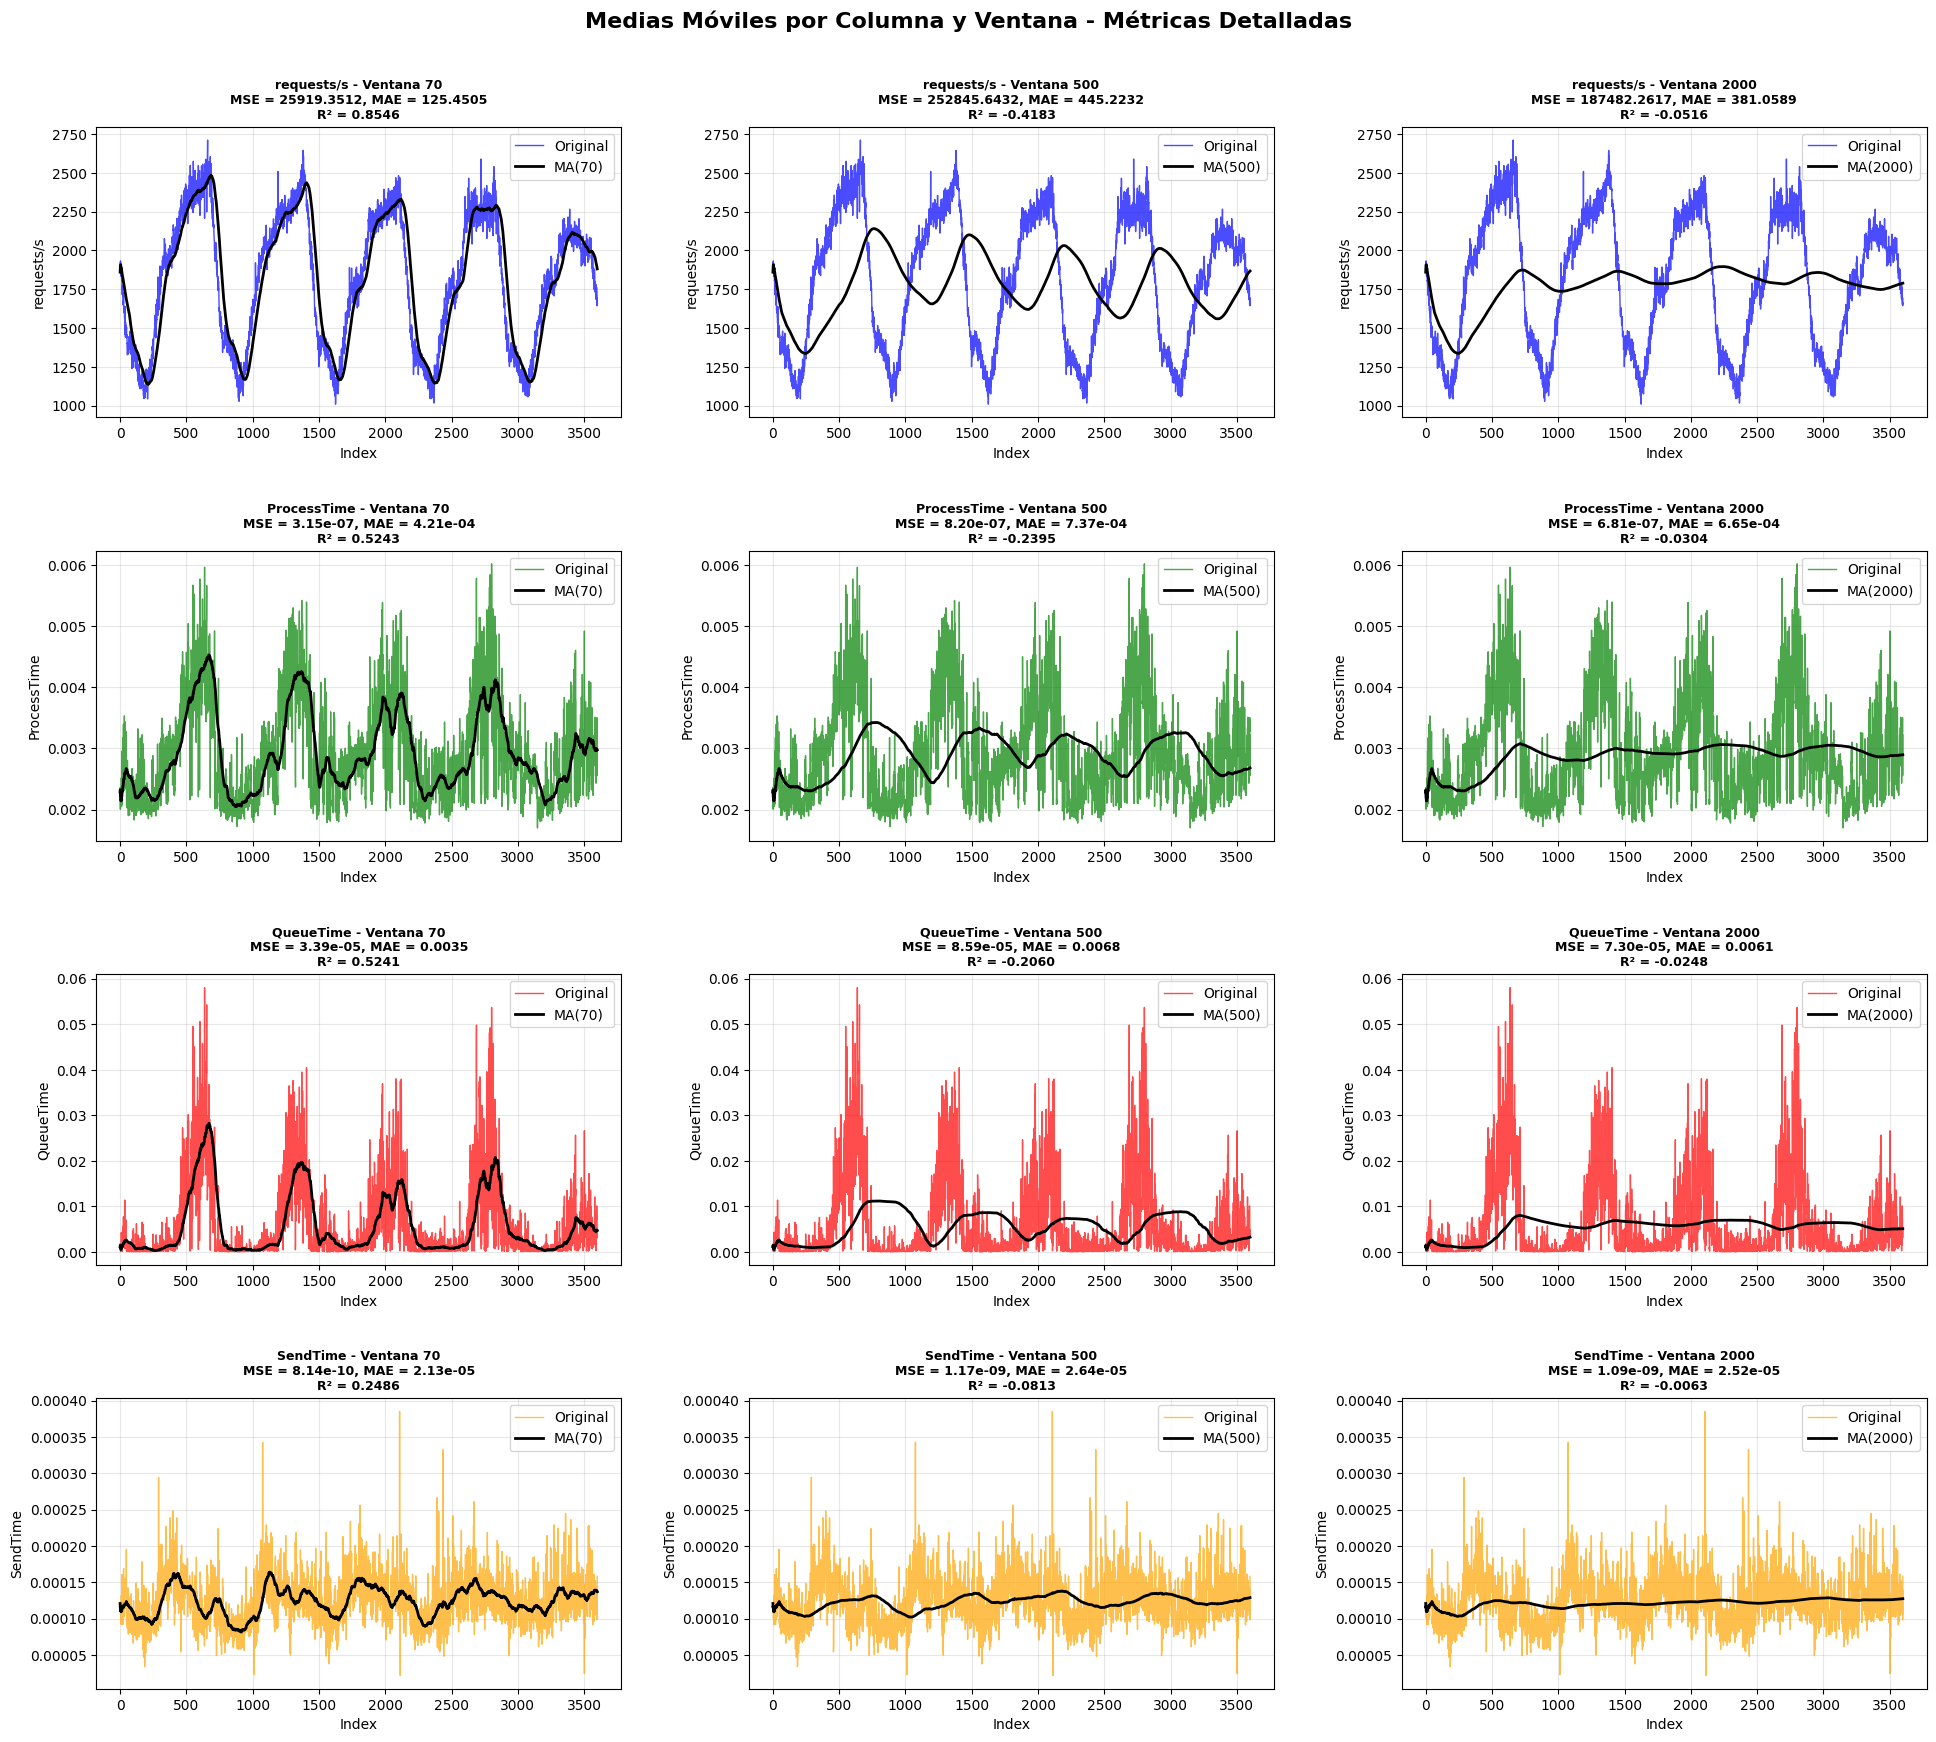


MEJOR CONFIGURACIÓN DE VENTANA POR COLUMNA (basado en menor MSE)
requests/s:
  Mejor Ventana: 70
  MSE: 25919.3512
  MAE: 125.4505
  R²: 0.8546
----------------------------------------
ProcessTime:
  Mejor Ventana: 70
  MSE: 3.15e-07
  MAE: 4.21e-04
  R²: 0.5243
----------------------------------------
QueueTime:
  Mejor Ventana: 70
  MSE: 3.39e-05
  MAE: 0.0035
  R²: 0.5241
----------------------------------------
SendTime:
  Mejor Ventana: 70
  MSE: 8.14e-10
  MAE: 2.13e-05
  R²: 0.2486
----------------------------------------


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define window sizes for moving averages
window_sizes = [70, 500, 2000]
colors = ['blue', 'green', 'red', 'orange']

# Create subplots for moving averages
fig, axes = plt.subplots(len(numeric_columns), len(window_sizes), figsize=(20, 18)) # Adjusted figsize for more metrics
fig.suptitle('Medias Móviles por Columna y Ventana - Métricas Detalladas', fontsize=16, fontweight='bold')

# Iterate through each numeric column
for col_idx, column in enumerate(numeric_columns):
    y_true = dataset[column].values
    
    # Iterate through each window size
    for win_idx, window in enumerate(window_sizes):
        # Calculate moving average using pandas rolling
        moving_avg = dataset[column].rolling(window=window, min_periods=1).mean().values
        
        # Calculate Metrics
        mse = mean_squared_error(y_true, moving_avg)
        mae = mean_absolute_error(y_true, moving_avg)
        r2 = r2_score(y_true, moving_avg)
        
        # Plot
        ax = axes[col_idx, win_idx]
        ax.plot(y_true, alpha=0.7, color=colors[col_idx], linewidth=1, label='Original')
        ax.plot(moving_avg, color='black', linewidth=2, label=f'MA({window})')
        
        # Use scientific notation for very small MSE/MAE values
        mse_str = f"{mse:.2e}" if mse < 0.001 else f"{mse:.4f}"
        mae_str = f"{mae:.2e}" if mae < 0.001 else f"{mae:.4f}"
        
        ax.set_title(f'{column} - Ventana {window}\nMSE = {mse_str}, MAE = {mae_str}\nR² = {r2:.4f}', 
                     fontweight='bold', fontsize=9) # Adjusted fontsize for title
        ax.set_xlabel('Index')
        ax.set_ylabel(column)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Print MSE, MAE, and R2 for each combination
        print(f"{column} - Ventana {window}: MSE = {mse_str}, MAE = {mae_str}, R² = {r2:.4f}")

plt.tight_layout(pad=3.0) # Adjusted padding
plt.show()

# Find the best window size (lowest MSE) for each column
print("\n" + "="*60)
print("MEJOR CONFIGURACIÓN DE VENTANA POR COLUMNA (basado en menor MSE)")
print("="*60)

for col_idx, column in enumerate(numeric_columns):
    best_mse = float('inf')
    best_mae = float('inf')
    best_r2 = float('-inf') # R2 is better when higher
    best_window = None
    
    y_true = dataset[column].values
    
    for window in window_sizes:
        moving_avg = dataset[column].rolling(window=window, min_periods=1).mean().values
        
        mse = mean_squared_error(y_true, moving_avg)
        mae = mean_absolute_error(y_true, moving_avg)
        r2 = r2_score(y_true, moving_avg)
        
        if mse < best_mse:
            best_mse = mse
            best_mae = mae
            best_r2 = r2
            best_window = window
            
    best_mse_str = f"{best_mse:.2e}" if best_mse < 0.001 else f"{best_mse:.4f}"
    best_mae_str = f"{best_mae:.2e}" if best_mae < 0.001 else f"{best_mae:.4f}"
    
    print(f"{column}:")
    print(f"  Mejor Ventana: {best_window}")
    print(f"  MSE: {best_mse_str}")
    print(f"  MAE: {best_mae_str}")
    print(f"  R²: {best_r2:.4f}")
    print("-" * 40)

requests/s (α=0.3): y = 0.010195x + 1786.099534, MSE = 1516.442664
requests/s (α=0.6): y = 0.010167x + 1786.056165, MSE = 500.934809
requests/s (α=0.9): y = 0.010150x + 1786.053092, MSE = 36.361797
ProcessTime (α=0.3): y = -0.000000x + 0.002927, MSE = 0.000000
ProcessTime (α=0.6): y = -0.000000x + 0.002928, MSE = 0.000000
ProcessTime (α=0.9): y = -0.000000x + 0.002928, MSE = 0.000000
QueueTime (α=0.3): y = -0.000000x + 0.006380, MSE = 0.000012
QueueTime (α=0.6): y = -0.000000x + 0.006389, MSE = 0.000004
QueueTime (α=0.9): y = -0.000000x + 0.006392, MSE = 0.000000
SendTime (α=0.3): y = 0.000000x + 0.000118, MSE = 0.000000
SendTime (α=0.6): y = 0.000000x + 0.000118, MSE = 0.000000
SendTime (α=0.9): y = 0.000000x + 0.000118, MSE = 0.000000


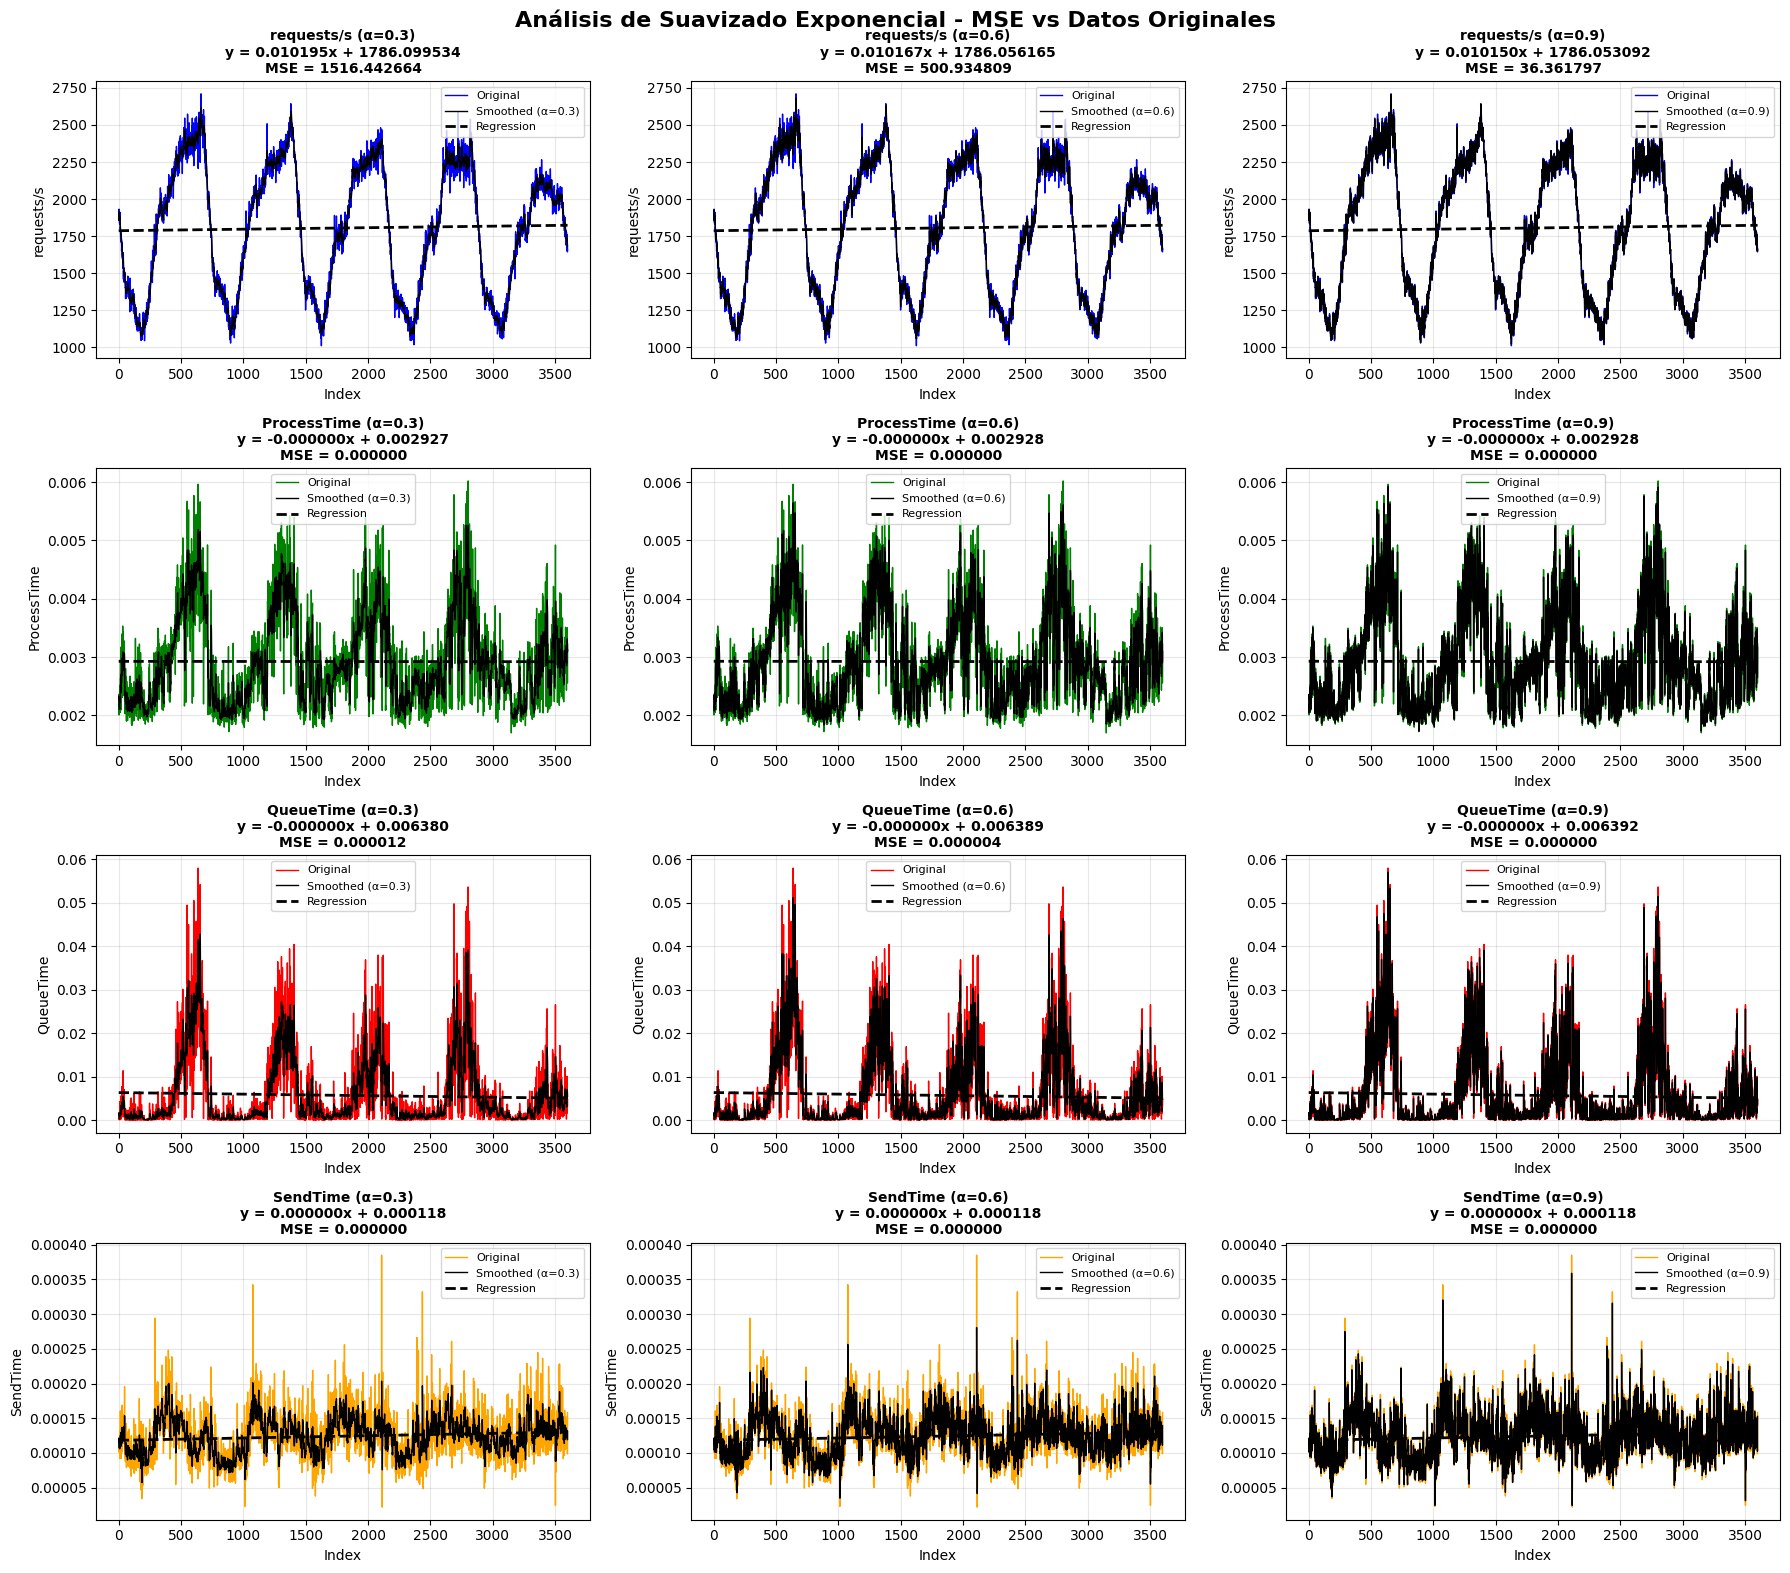


MEJOR CONFIGURACIÓN POR COLUMNA (menor MSE)
requests/s:
  Mejor α: 0.9
  Ecuación: y = 0.010150x + 1786.053092
  MSE: 36.361797

ProcessTime:
  Mejor α: 0.9
  Ecuación: y = -0.000000x + 0.002928
  MSE: 0.000000

QueueTime:
  Mejor α: 0.9
  Ecuación: y = -0.000000x + 0.006392
  MSE: 0.000000

SendTime:
  Mejor α: 0.9
  Ecuación: y = 0.000000x + 0.000118
  MSE: 0.000000



In [42]:
# Exponential smoothing analysis with different alpha values
alpha_values = [0.3, 0.6, 0.9]

fig, axes = plt.subplots(len(numeric_columns), len(alpha_values), figsize=(18, 16))
fig.suptitle('Análisis de Suavizado Exponencial - MSE vs Datos Originales', fontsize=16, fontweight='bold')

for col_idx, column in enumerate(numeric_columns):
    for alpha_idx, alpha in enumerate(alpha_values):
        # Apply exponential smoothing
        data_series = dataset[column]
        smoothed_data = data_series.ewm(alpha=alpha).mean().values
        
        # Prepare data for regression
        X_smooth = np.arange(len(smoothed_data)).reshape(-1, 1)
        
        # Fit linear regression on smoothed data
        model_smooth = LinearRegression()
        model_smooth.fit(X_smooth, smoothed_data)
        
        # Get parameters
        m_smooth = model_smooth.coef_[0]
        n_smooth = model_smooth.intercept_
        
        # Generate predictions
        y_pred_smooth = model_smooth.predict(X_smooth)
        
        # Calculate MSE between original data and exponential smoothing (not regression)
        mse_smooth = mean_squared_error(data_series.values, smoothed_data)
        
        # Plot
        ax = axes[col_idx, alpha_idx]
        ax.plot(X_smooth, data_series.values, color=colors[col_idx], linewidth=1, label='Original')
        ax.plot(X_smooth, smoothed_data, color='black', alpha=1, linewidth=1, label=f'Smoothed (α={alpha})')
        ax.plot(X_smooth, y_pred_smooth, color='black', linewidth=2, linestyle='--', label='Regression')
        ax.set_title(f'{column} (α={alpha})\ny = {m_smooth:.6f}x + {n_smooth:.6f}\nMSE = {mse_smooth:.6f}', 
                    fontweight='bold', fontsize=10)
        ax.set_xlabel('Index')
        ax.set_ylabel(column)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
        
        print(f"{column} (α={alpha}): y = {m_smooth:.6f}x + {n_smooth:.6f}, MSE = {mse_smooth:.6f}")

plt.tight_layout()
plt.show()


# Find the best alpha (lowest MSE) for each column
print("\n" + "="*50)
print("MEJOR CONFIGURACIÓN POR COLUMNA (menor MSE)")
print("="*50)

for col_idx, column in enumerate(numeric_columns):
    best_mse = float('inf')
    best_alpha = None
    best_params = None
    
    for alpha in alpha_values:
        # Apply exponential smoothing
        data_series = dataset[column]
        smoothed_data = data_series.ewm(alpha=alpha).mean().values
        
        # Prepare data for regression
        X_smooth = np.arange(len(smoothed_data)).reshape(-1, 1)
        
        # Fit linear regression on smoothed data
        model_smooth = LinearRegression()
        model_smooth.fit(X_smooth, smoothed_data)
        
        # Get parameters
        m_smooth = model_smooth.coef_[0]
        n_smooth = model_smooth.intercept_
        
        # Calculate MSE between original data and exponential smoothing (not regression)
        mse_smooth = mean_squared_error(data_series.values, smoothed_data)
        
        # Check if this is the best so far
        if mse_smooth < best_mse:
            best_mse = mse_smooth
            best_alpha = alpha
            best_params = (m_smooth, n_smooth)
    
    print(f"{column}:")
    print(f"  Mejor α: {best_alpha}")
    print(f"  Ecuación: y = {best_params[0]:.6f}x + {best_params[1]:.6f}")
    print(f"  MSE: {best_mse:.6f}")
    print()
